## Resolução desfio semana 9

Neste desafio deverá descobrir quais estudantes estão fazendo a prova apenas para treino.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e IN_TREINEIRO.

3. Foi considerado treineiro o inscrito que tinha menos de 18 anos no primeiro dia de realização do exame (05/11/2016) e que não havia concluído o ensino médio e não o concluiria em 2016					

In [2]:
import functools
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as sct
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_blobs, make_classification
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [3]:
%matplotlib inline
from IPython.core.pylabtools import figsize


figsize(12, 12)

sns.set()

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
list(train.columns)

['Unnamed: 0',
 'NU_INSCRICAO',
 'NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR

In [6]:
train[['NU_INSCRICAO', 'NU_IDADE', 'TP_ST_CONCLUSAO','TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_ANO_CONCLUIU', 'TP_PRESENCA_CN',  'TP_PRESENCA_CH',  'TP_PRESENCA_LC',  'TP_PRESENCA_MT']].dtypes

NU_INSCRICAO        object
NU_IDADE             int64
TP_ST_CONCLUSAO      int64
TP_ANO_CONCLUIU      int64
TP_ESCOLA            int64
TP_ENSINO          float64
IN_TREINEIRO         int64
TP_ANO_CONCLUIU      int64
TP_PRESENCA_CN       int64
TP_PRESENCA_CH       int64
TP_PRESENCA_LC       int64
TP_PRESENCA_MT       int64
dtype: object

In [7]:
list(test.columns)

['NU_INSCRICAO',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'TP_DEPENDENCIA_ADM_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q047']

In [8]:
#lista de inscritos que tem marcado = 1 no IN_TREINEIRO

train['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

In [ ]:
#Passos para resolver ...
#verificar os nan
#tirei a cluna tp_instituicao


#1- primeiro usar aquele smote la pra pegar e deixar a msm quantidade de treineiros e nao treineiros
#acho que é melhor pegar e diminuir os nao treineiros
#https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/


#2- depois que estiver tudo equilibrado, pegar e testar os algoritmos tipo o regressao logistica, arvore de decisao e o kmeans seila

#3- depois que rodar com cada um dos algoritmos, pegar e ver qual teve a melhor precisao, recal, acuracia e o f-socre 

In [11]:
colunas = [ 'NU_INSCRICAO', 'NU_IDADE', 'TP_ST_CONCLUSAO','TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO',
       'TP_ANO_CONCLUIU', 'TP_PRESENCA_CN',  'TP_PRESENCA_CH',  'TP_PRESENCA_LC',  'TP_PRESENCA_MT']
colunasX = [ 'NU_IDADE', 'TP_ST_CONCLUSAO','TP_ANO_CONCLUIU', 'TP_ESCOLA', 
       'TP_ANO_CONCLUIU', 'TP_PRESENCA_CN',  'TP_PRESENCA_CH',  'TP_PRESENCA_LC',  'TP_PRESENCA_MT' ]

In [12]:
X, y= train[colunasX], train['IN_TREINEIRO']

In [13]:
y.value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

In [14]:
pca = PCA(n_components=2)

#pca.fit(X)

imbalanced_pca = pca.fit_transform(X)

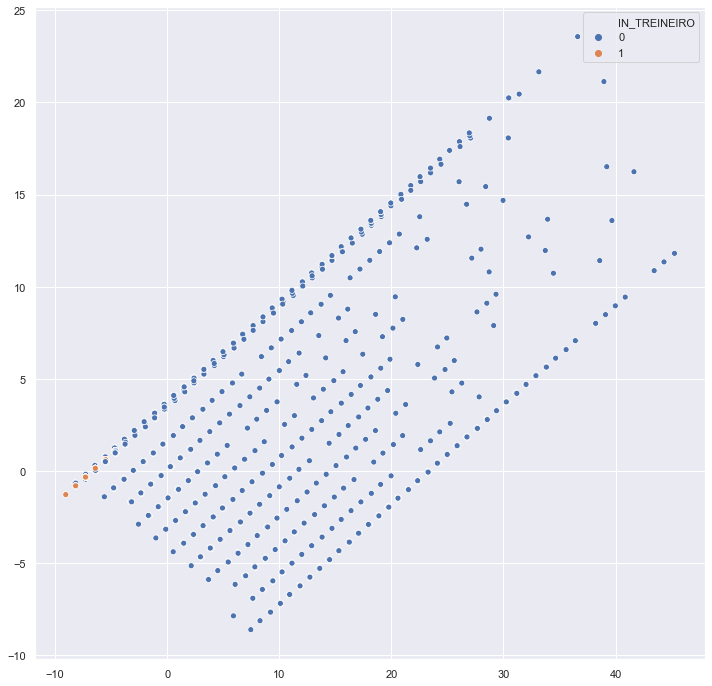

In [16]:
sns.scatterplot(imbalanced_pca[:, 0], imbalanced_pca[:, 1], hue=y);

In [17]:
smote = SMOTE(sampling_strategy="minority")

#X_smote, y_smote = smote.fit_resample(imbalanced.iloc[:, :-1], imbalanced.target)
X_smote, y_smote = smote.fit_sample(X.to_numpy(), y.to_numpy())

In [18]:
train_pca_smote = pca.transform(X_smote)

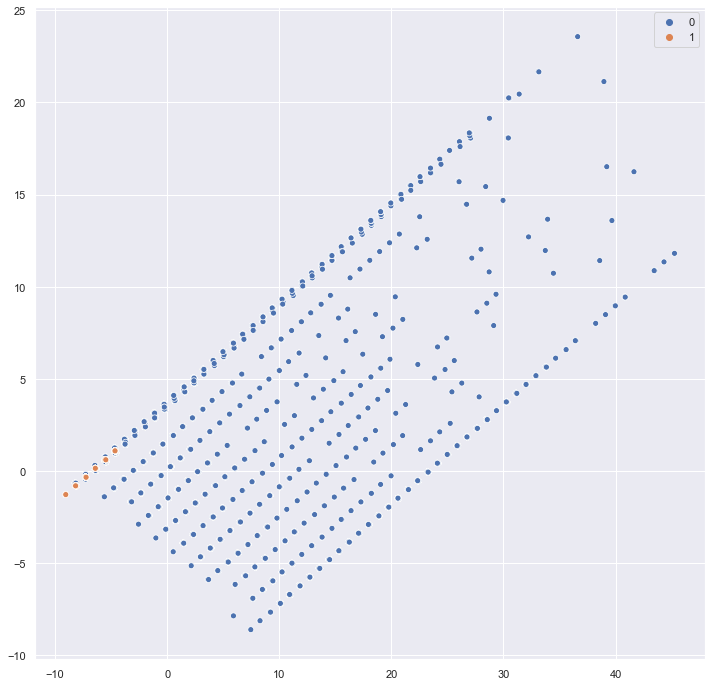

In [19]:
sns.scatterplot(x=train_pca_smote[:, 0], y=train_pca_smote[:, 1], hue=y_smote);

In [20]:
sum(y_smote == True)/sum(y_smote == False)

1.0

In [130]:
train.shape

(13730, 167)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2)

X_train.shape

(19115, 9)

In [28]:
y_test.shape

(4779,)

In [27]:
X_test.shape

(4779, 9)

In [29]:
logistic = LogisticRegression()

logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
logistic.predict_proba(X)

array([[1.00000000e+00, 8.45189353e-24],
       [9.98206858e-01, 1.79314233e-03],
       [9.99964957e-01, 3.50434730e-05],
       ...,
       [1.10977756e-05, 9.99988902e-01],
       [1.00000000e+00, 1.04987615e-29],
       [9.98206858e-01, 1.79314233e-03]])

In [42]:
pred = logistic.predict(test[colunasX])

In [43]:
#Gerando a tabela com os resultados
tabela_resultado = test[['NU_INSCRICAO']]
tabela_resultado['IN_TREINEIRO'] = np.around(pred,2)

#exportando o .csv
tabela_resultado.to_csv('answer.csv', index=False, header=True)

C:\Users\mxapi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


__Conclusão: no desafio dessa semana eu nem acreditei que consegui resolver na primeira tentativa e ainda foi 98,5%.__